In [48]:
! pip install opencv-python

In [49]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (1.3.1)


# Steps 
### 1. Data analysis 
### 2. load the dataset 
### 3. Display sample images
### 4. Image statics and histogram of pixel value vs pixel frequency
### 5. Image channel ,image format Analysis
### 6. Image augmentation

In [50]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import random
from sklearn.cluster import KMeans

In [51]:
dataset_folder = './data'

In [52]:
# Data analysis 
def count_images_in_subfolders(folder):
    folder_counts = {}

    
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            num_images = len([filename for filename in os.listdir(class_folder) if filename.lower().endswith(('.jpg', '.jpeg'))])
            folder_counts[class_name] = num_images
    
    return folder_counts

In [53]:

image_counts = count_images_in_subfolders(dataset_folder)

for class_name, ccount in image_counts.items():
    print(f'Class: {class_name} - Number of Images: {ccount}')


Class: George_W_Bush - Number of Images: 10
Class: BIM2016002 - Number of Images: 10
Class: Colin_Powell - Number of Images: 10
Class: Hugo_Chavez - Number of Images: 10
Class: Ariel_Sharon - Number of Images: 10
Class: IHM2016005 - Number of Images: 10
Class: Arnold_Schwarzenegger - Number of Images: 10
Class: IIT2016044 - Number of Images: 10
Class: IIT2016135 - Number of Images: 10
Class: ITM2016007 - Number of Images: 10
Class: Gerhard_Schroeder - Number of Images: 10
Class: Jacques_Chirac - Number of Images: 10
Class: Vladimir_Putin - Number of Images: 10
Class: Tony_Blair - Number of Images: 10
Class: Donald_Rumsfeld - Number of Images: 10


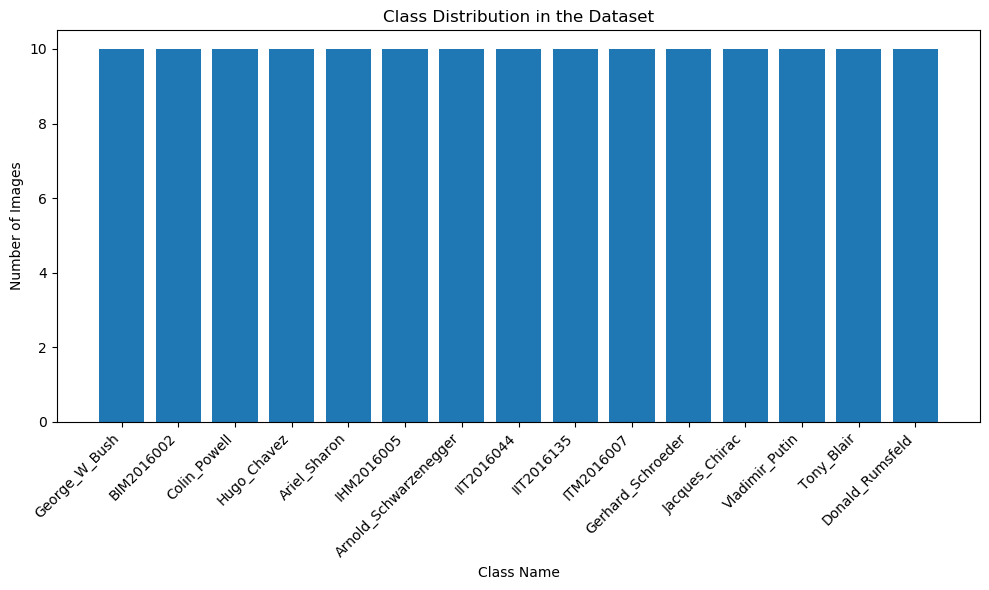

In [54]:

class_names = list(image_counts.keys())
class_counts = list(image_counts.values())

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Class Distribution in the Dataset')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [55]:
# loading images from subfolders
def load_images_from_subfolders(folder):
    image_data = []
    class_labels = []

    
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img = cv2.imread(os.path.join(class_folder, filename))
                if img is not None:
                    
                    img = cv2.resize(img, (100, 100))
                    image_data.append(img)
                    class_labels.append(class_name)
    
    return image_data, class_labels

In [60]:
image_data, class_labels = load_images_from_subfolders(dataset_folder)

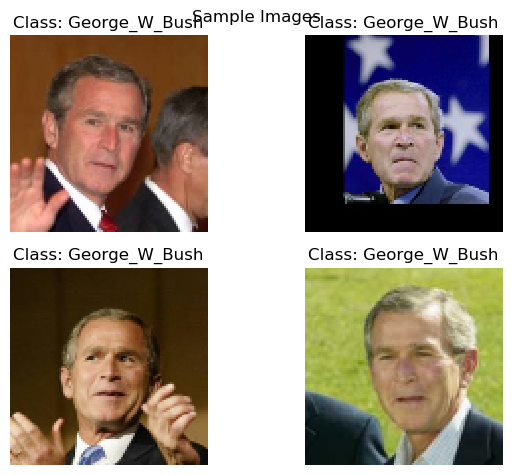

In [61]:
# Display sample images
plt.subplot(1, 2, 2)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(image_data[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Class: {class_labels[i]}')
    plt.axis('off')
plt.suptitle('Sample Images')

plt.tight_layout()
plt.show()


In [62]:



# Image statistics
mean_pixel_value = np.mean(image_data)
stddev_pixel_value = np.std(image_data)

In [63]:
print(f'Mean Pixel Value: {mean_pixel_value}')
print(f'Std Dev Pixel Value: {stddev_pixel_value}')

Mean Pixel Value: 108.38993377777778
Std Dev Pixel Value: 74.17521164021828


Text(0, 0.5, 'Frequency')

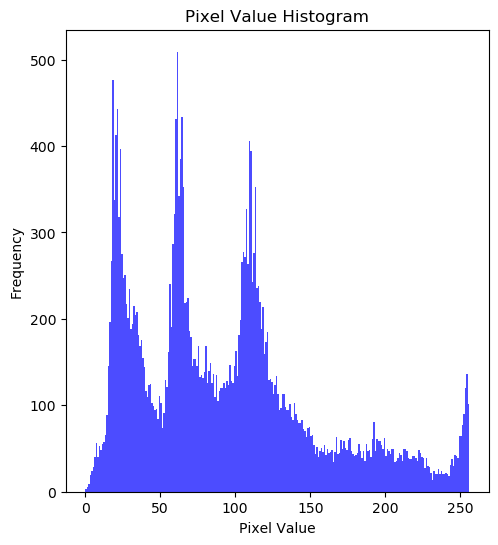

In [58]:
# histograms of pixel values and pixel value distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_data[0].ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
plt.title('Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


In [15]:
# check image dimensions
def check_image_channels(image_data):
    num_channels = []
    for image in image_data:
        num_channels.append(image.shape[2])
    return num_channels


In [27]:

num_channels = check_image_channels(image_data)
print(f'Number of channels: {num_channels}')

if num_channels[0]==3:
    print('RGB image')


Number of channels: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
RGB image


It means all the images have 3 channels

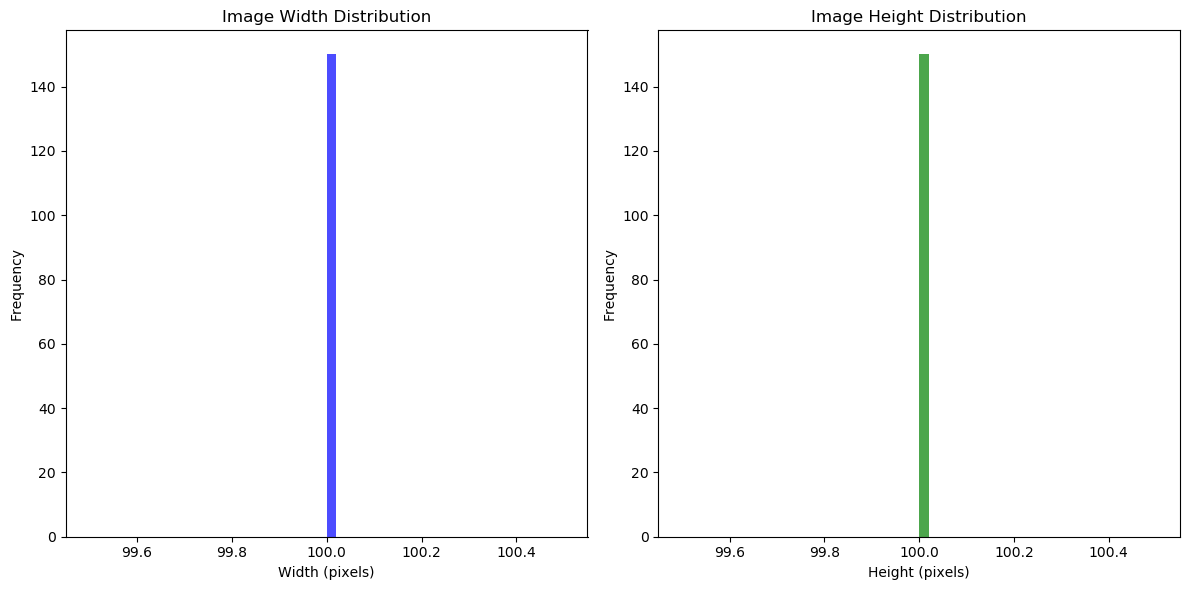

In [65]:
# analyze image dimensions
def analyze_image_dimensions(images):
    widths = []
    heights = []

    for img in images:
        height, width, _ = img.shape
        widths.append(width)
        heights.append(height)
    
    return widths, heights


image_data, class_labels = load_images_from_subfolders(dataset_folder)


widths, heights = analyze_image_dimensions(image_data)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=50, color='b', alpha=0.7)
# ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=50, color='g', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [39]:
# image augmentation
def augment_images(images, num_samples=9):
    augmented_images = []
    
    for i in range(num_samples):
        img = random.choice(images)
       
        augmented_img = img.copy()
        if random.random() < 0.5:
            augmented_img = cv2.flip(augmented_img, 1)  
        if random.random() < 0.5:
            rotation_angle = random.randint(0, 45)
            rotation_matrix = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), rotation_angle, 1)
            augmented_img = cv2.warpAffine(augmented_img, rotation_matrix, (img.shape[1], img.shape[0]))
            # ref: https://theailearner.com/tag/cv2-getrotationmatrix2d/
        augmented_images.append(augmented_img)
    
    return augmented_images

In [1]:
# pixel distribution of each class of images

def plot_class_images(image_data, class_labels, class_name, num_samples=9):
    images = []
    for i in range(len(image_data)):
        if class_labels[i] == class_name:
            images.append(image_data[i])
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Class: {class_name}')
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
plot_class_images(image_data, class_labels, 'Ariel_Sharon', num_samples=9)